In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
import pylab as plt
from matplotlib import rc
from pylab import figure, show, legend, xlabel, ylabel


import statsmodels.api as sm
import scipy.stats as stats
from scipy.io import loadmat

In [2]:
df = pd.read_csv("/home/rodolfoch/Computacional/Actividad7/huatbien.csv")

In [3]:
df.columns= ['Año','Mes','Día','Hora(utc)','Altura(mm)']

In [4]:
df.head()

,Año,Mes,Día,Hora(utc),Altura(mm)
0,2016,5,6,2,-28
1,2016,5,6,3,76
2,2016,5,6,4,277
3,2016,5,6,5,519
4,2016,5,6,6,736


In [5]:
from datetime import datetime
df['Fecha']= df.apply(lambda x:datetime.strptime("{0} {1} {2} {3}".format(x[u'Año'],x[u'Mes'], x[u'Día'], x[u'Hora(utc)']), "%Y %m %d %H"),axis=1)

In [6]:
df.columns

Index(['Año', 'Mes', 'Día', 'Hora(utc)', 'Altura(mm)', 'Fecha'], dtype='object')

In [7]:
df.dtypes

Año                    int64
Mes                    int64
Día                    int64
Hora(utc)              int64
Altura(mm)             int64
Fecha         datetime64[ns]
dtype: object

In [8]:
df.head()

,Año,Mes,Día,Hora(utc),Altura(mm),Fecha
0,2016,5,6,2,-28,2016-05-06 02:00:00
1,2016,5,6,3,76,2016-05-06 03:00:00
2,2016,5,6,4,277,2016-05-06 04:00:00
3,2016,5,6,5,519,2016-05-06 05:00:00
4,2016,5,6,6,736,2016-05-06 06:00:00


In [9]:
df['Altura(mm)']= pd.to_numeric(df['Altura(mm)'], errors='coerce') #para pasar la altura de ovbjetc a float

In [10]:
#df_new.head()

In [11]:
#estyo siempre no, se modificó el archuivo en emacs, desde las dechas que dice aqui abajo
#df_new = df[(df['Fecha'] > '2016-05-06 01:00:00') & (df['Fecha'] <= '2016-08-22 06:00:00')] #intervalo de fechas

In [12]:
df.head(),df.tail()

(    Año  Mes  Día  Hora(utc)  Altura(mm)               Fecha
 0  2016    5    6          2         -28 2016-05-06 02:00:00
 1  2016    5    6          3          76 2016-05-06 03:00:00
 2  2016    5    6          4         277 2016-05-06 04:00:00
 3  2016    5    6          5         519 2016-05-06 05:00:00
 4  2016    5    6          6         736 2016-05-06 06:00:00,
        Año  Mes  Día  Hora(utc)  Altura(mm)               Fecha
 2592  2016    8   22          2         630 2016-08-22 02:00:00
 2593  2016    8   22          3         321 2016-08-22 03:00:00
 2594  2016    8   22          4          74 2016-08-22 04:00:00
 2595  2016    8   22          5         -43 2016-08-22 05:00:00
 2596  2016    8   22          6           0 2016-08-22 06:00:00)

In [13]:
df.dtypes

Año                    int64
Mes                    int64
Día                    int64
Hora(utc)              int64
Altura(mm)             int64
Fecha         datetime64[ns]
dtype: object

In [14]:
2596

2596

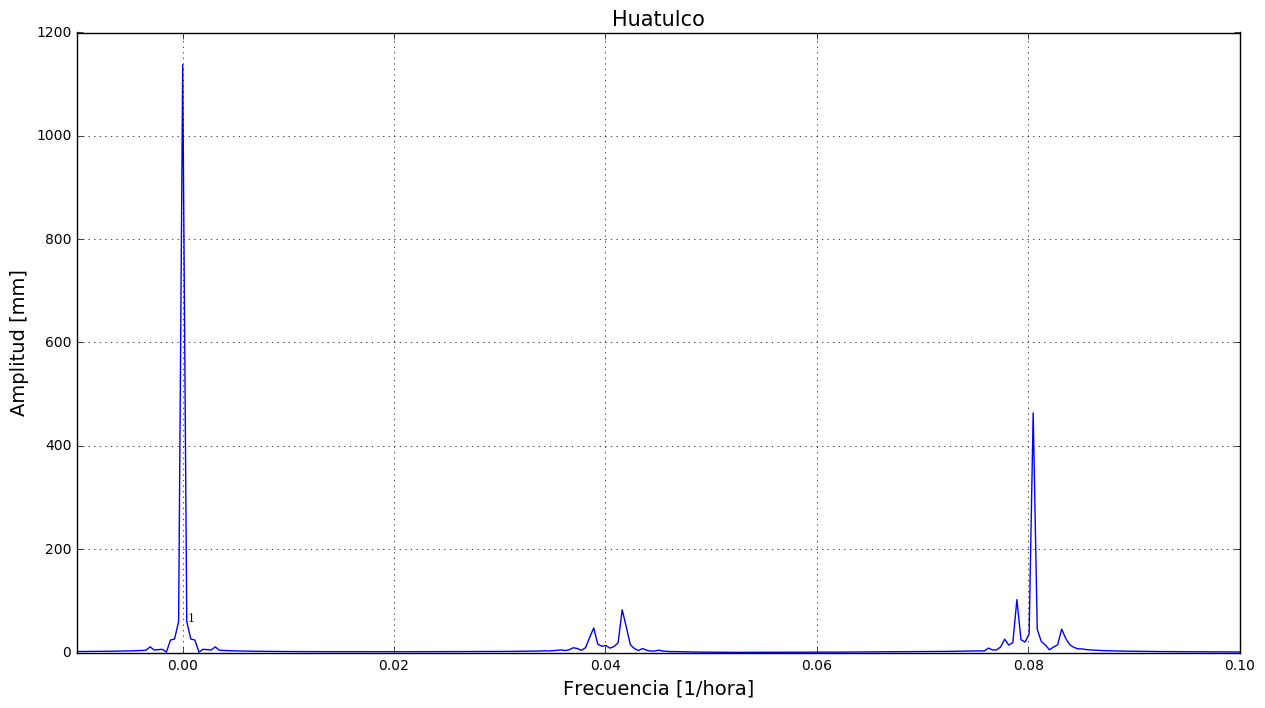

In [29]:
from scipy.fftpack import fft, fftfreq, fftshift
import numpy as np
# numero de datos
N = 2597
# Separacion de tiempo entre cada medicion
T = 1.0

#aplicacion de la transformada de fourier a los datos
y = df[u"Altura(mm)"]
yf = fft(y)
 #Cambio de variable de tiempo a uno de frecuencias.
xf = fftfreq(N, T)
xf = fftshift(xf)
# Conjunto de datos dados por la transformada de fourier para graficar
yplot = fftshift(yf)

#grafica de lo obtenido con la transformada de Fourier
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N *np.abs(yplot), 'b-')
plt.xlim(-0.01, 0.1) 
plt.grid(True)
plt.xlabel('Frecuencia [1/hora]', fontsize=14)
plt.ylabel('Amplitud [mm]', fontsize=14)
plt.title('Huatulco', fontsize=15)
fig = plt.gcf()
fig.set_size_inches(15, 8)


#Calando a ver si jala
plt.text(0.000385059684251, 59.9016992925, '$1$')
plt.show()



In [16]:
a = 2*np.absolute(yf)/N #N_d es el numero de datos especificado en donde se trabajó con la transformada rapida de fourier

In [17]:
print(np.where(a[:,]>25)) #### ando con esto
b= a[a[:,]>25]
b

(array([   0,    1,    2,  100,  101,  108,  109,  202,  205,  208,  209,
        210,  216,  217, 2380, 2381, 2387, 2388, 2389, 2392, 2395, 2488,
       2489, 2496, 2497, 2595, 2596]),)


array([ 1137.79283789,    59.90169929,    26.06367895,    28.92596781,
          47.49734193,    82.76279772,    49.69035015,    25.71511853,
         102.37608803,    35.97289977,   463.70108706,    44.79733118,
          45.24414595,    27.11388926,    27.11388926,    45.24414595,
          44.79733118,   463.70108706,    35.97289977,   102.37608803,
          25.71511853,    49.69035015,    82.76279772,    47.49734193,
          28.92596781,    26.06367895,    59.90169929])

In [18]:
#
print( 'Primer Armónico notorio')
print('Amplitud=',2.0*np.absolute(yf[1,]/N))
print('frecuencia=', xf[int(N/2 +1),])
print('periodo=', 1/xf[int(N/2 +1),])
print()

Primer Armónico notorio
Amplitud= 59.9016992925
frecuencia= 0.000385059684251
periodo= 2597.0



In [19]:
from scipy.fftpack import fft, fftfreq, fftshift
import numpy as np
# numero de datos
N = 2597
# Separacion de tiempo entre cada medicion
T = 1.0

#aplicacion de la transformada de fourier a los datos
y = df[u"Altura(mm)"]
yf = fft(y)
 #Cambio de variable de tiempo a uno de frecuencias.
xf = fftfreq(N, T)
xf = fftshift(xf)
# Conjunto de datos dados por la transformada de fourier para graficar
yplot = fftshift(yf)

#SON 14 en total, faltan otras 2
A0_s = np.absolute(yf[int(0),]/N)
A1_s = 2.0*np.absolute(yf[int(1),]/N)
A2_s = 2.0*np.absolute(yf[int(2),]/N)
A3_s= 2.0*np.absolute(yf[int(100),]/N)
A4_s = 2.0*np.absolute(yf[int(101),]/N)
A5_s = 2.0*np.absolute(yf[int(108),]/N)
A6_s = 2.0*np.absolute(yf[int(109),]/N)
A7_s = 2.0*np.absolute(yf[int(202),]/N)
A8_s = 2.0*np.absolute(yf[int(205),]/N)
A9_s = 2.0*np.absolute(yf[int(208),]/N)
A10_s =  2.0*np.absolute(yf[int(209),]/N)
A11_s = 2.0*np.absolute(yf[int(210),]/N)
A12_s = 2.0*np.absolute(yf[int(216),]/N)


In [20]:
#Periodos 
f_A1s = xf[int(1298.5 +1)]
f_A2s = xf[int(1298.5 +2),]
f_A3s =  xf[int(1298.5 +100),]
f_A4s =  xf[int(1298.5 +101),]
f_A5s =  xf[int(1298.5 +108),]
f_A6s =  xf[int(1298.5 +109),]
f_A7s =  xf[int(1298.5 +202),]
f_A8s =  xf[int(1298.5 +205),]
f_A9s =  xf[int(1298.5 +208),]
f_A10s =  xf[int(1298.5 +209),]
f_A11s =  xf[int(1298.5 +210),]
f_A12s =  xf[int(1298.5 +216),]



In [21]:
# Fases 
qA0s = np.angle(yf[int(0),])
qA1s = np.angle(yf[int(1),])
qA2s = np.angle(yf[int(2),])
qA3s = np.angle(yf[int(100),])
qA4s = np.angle(yf[int(101),])
qA5s = np.angle(yf[int(108),])
qA6s =  np.angle(yf[int(109),])
qA7s =  np.angle(yf[int(202),])
qA8s =  np.angle(yf[int(205),])
qA9s =  np.angle(yf[int(208),])
qA10s =  np.angle(yf[int(209),])
qA11s =  np.angle(yf[int(210),])
qA12s =  np.angle(yf[int(216),])

In [22]:
k = np.arange(0, 2596, 1.0)

In [23]:
df['T'] =  pd.Series(k, index =None)

In [24]:
#Obteniendo la marea

w= 2.0*np.pi
a=0
def f(t):
    return A0_s + (A1_s*np.cos(w*f_A1s*t+qA1s) + A2_s*np.cos(w*f_A2s *t+qA2s) 
                   + A3_s*np.cos(w*f_A3s*t+qA3s) + A4_s*np.cos(w*f_A4s*t + qA4s)
                   + A5_s*np.cos(w*f_A5s*t+qA5s) + A6_s*np.cos(w*f_A6s*t + qA6s)
                   + A7_s*np.cos(w*f_A7s*t+qA7s) + A8_s*np.cos(w*f_A8s*t+ qA8s)
                   + A9_s*np.cos(w*f_A9s*t+ qA9s) + A10_s*np.cos(w*f_A10s*t+ qA10s) 
                   + A11_s*np.cos(w*f_A11s*t+ qA11s) + A12_s*np.cos(w*f_A12s*t+ qA12s))

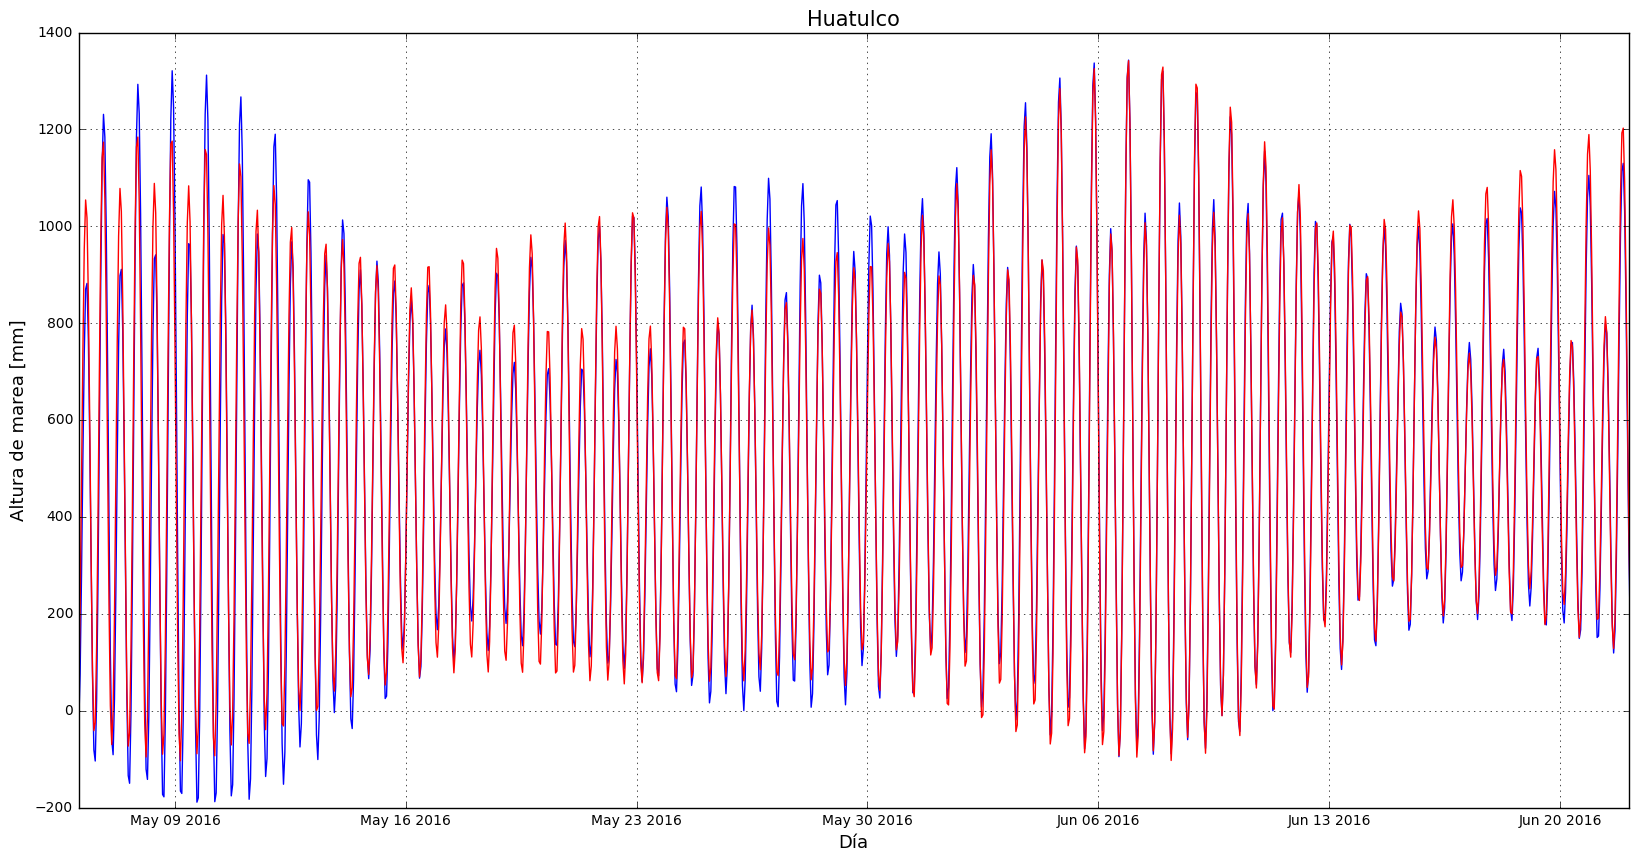

In [30]:
#mostrando la aproximación y la real
import matplotlib.pyplot as plt
plt.plot(df['Fecha'], y, 'b-', label ="Altura")
plt.plot(df['Fecha'], f(df['T']), 'r-', label='Altura recosntruida')
plt.xlim(pd.Timestamp("2016-05-06 02:00:00"), pd.Timestamp('2016-06-22 02:00:00'))
plt.ylabel('Altura de marea [mm]', fontsize = 13)
plt.xlabel('Día', fontsize = 13)
plt.title('Huatulco', fontsize= 15)
plt.grid(True) 

fig = plt.gcf()

fig.set_size_inches(20, 10)
plt.show()


In [26]:
# error:
y_0=df['Altura(mm)']
y_1=f(df['T'])

In [27]:
E= np.sum(abs(y_0-y_1)**2) / np.sum(np.abs(y_0)**2)
E

0.008324865114472208